In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('baseline data.csv')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [4]:
liver = df
liver.head()

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [5]:
liver.columns

Index(['Unnamed: 0', 'id', 'age', 'male', 'weight', 'height', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

In [6]:
liver.rename(columns={'Unnamed: 0':'Un', 'male':'gender','weight':'weight_kg','height':'height_cm'}, inplace = True)

In [7]:
liver.head()

,Un,id,age,gender,weight_kg,height_cm,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [8]:
liver.columns

Index(['Un', 'id', 'age', 'gender', 'weight_kg', 'height_cm', 'bmi', 'case.id',
       'futime', 'status'],
      dtype='object')

In [9]:
df = liver.drop(["Un","case.id"],axis=1)
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status
0,1,57,0,60.0,163.0,22.690939,6261,0
1,2,67,0,70.4,168.0,24.884028,624,0
2,3,53,1,105.8,186.0,30.453537,1783,0
3,4,56,1,109.3,170.0,37.830100,3143,0
4,5,68,1,NaN,NaN,NaN,1836,1


In [10]:
df.shape

(17549, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         17549 non-null  int64  
 1   age        17549 non-null  int64  
 2   gender     17549 non-null  int64  
 3   weight_kg  12763 non-null  float64
 4   height_cm  14381 non-null  float64
 5   bmi        12588 non-null  float64
 6   futime     17549 non-null  int64  
 7   status     17549 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.1 MB


In [12]:
df.describe()

,id,age,gender,weight_kg,height_cm,bmi,futime,status
count,17549.000000,17549.000000,17549.000000,12763.000000,14381.000000,12588.000000,17549.000000,17549.000000
mean,8784.215967,52.659639,0.467320,86.353350,169.434949,30.073865,2410.600547,0.077725
std,5070.970712,14.722515,0.498945,22.239458,10.141421,7.085435,1573.017638,0.267746
min,1.000000,18.000000,0.000000,33.400000,123.000000,9.207332,7.000000,0.000000
25%,4393.000000,42.000000,0.000000,70.000000,162.000000,25.136434,1132.000000,0.000000
50%,8786.000000,53.000000,0.000000,83.900000,169.000000,28.875884,2148.000000,0.000000
75%,13175.000000,63.000000,1.000000,99.200000,177.000000,33.710372,3353.000000,0.000000
max,17566.000000,98.000000,1.000000,181.700000,215.000000,84.395725,7268.000000,1.000000


In [13]:
df.isnull().sum()

id              0
age             0
gender          0
weight_kg    4786
height_cm    3168
bmi          4961
futime          0
status          0
dtype: int64

In [14]:
df["gender"].unique()

array([0, 1], dtype=int64)

In [15]:
df['gender'] = df['gender'].replace([0,1],['female','male'])

In [16]:
df.head(2)

,id,age,gender,weight_kg,height_cm,bmi,futime,status
0,1,57,female,60.0,163.0,22.690939,6261,0
1,2,67,female,70.4,168.0,24.884028,624,0


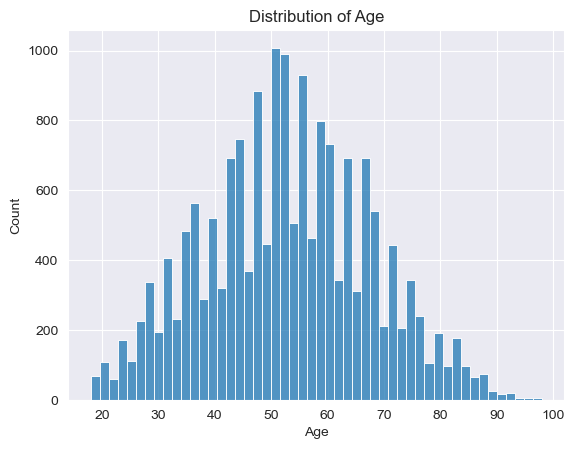

In [17]:
sns.histplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

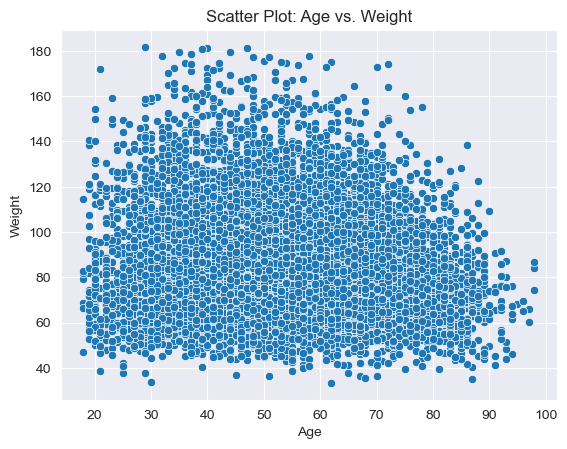

In [18]:
sns.scatterplot(x='age', y='weight_kg', data=df)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Scatter Plot: Age vs. Weight')
plt.show()
#Hence it concludes that there is no relationship of age and weight

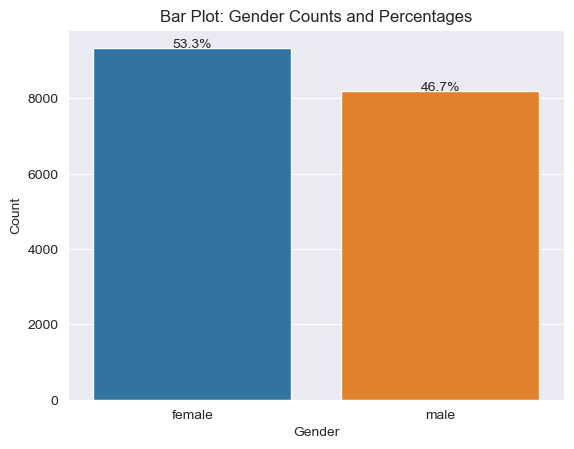

In [19]:
ax = sns.countplot(x='gender',data=df)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 3, f'{height / total * 100:.1f}%', ha="center")
    
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot: Gender Counts and Percentages')
plt.show()

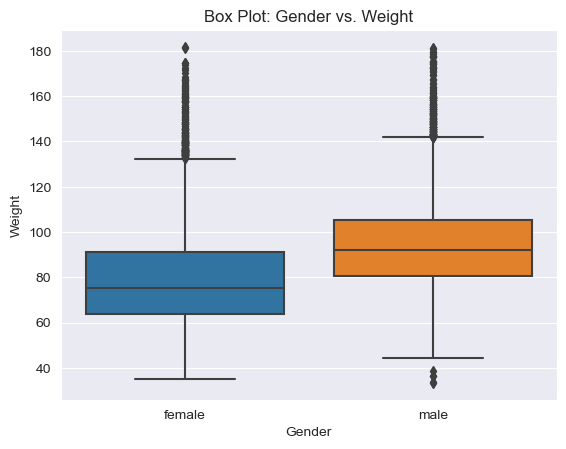

In [20]:
sns.boxplot(x='gender', y='weight_kg', data=df)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Box Plot: Gender vs. Weight')
plt.show()
#Therefore, we can see that there is a relationship between gender and the weight

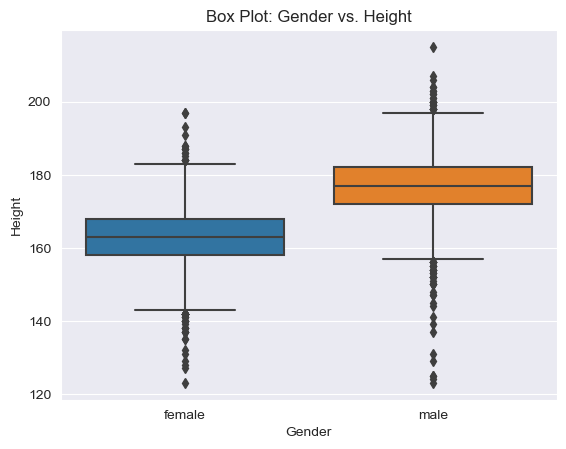

In [21]:
sns.boxplot(x='gender', y='height_cm', data=df)
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title('Box Plot: Gender vs. Height')
plt.show()
#Hence there is a relationship between height and gender

In [22]:
df['weight_kg'] = df.groupby('gender', group_keys=False)['weight_kg'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)


In [23]:
df['height_cm'] = df.groupby('gender', group_keys=False)['height_cm'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)


In [24]:
df['bmi'] = df.apply(lambda row: row['weight_kg'] / ((row['height_cm'] / 100) ** 2) if pd.isna(row['bmi']) else row['bmi'], axis=1)

In [25]:
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status
0,1,57,female,60.000000,163.000000,22.690939,6261,0
1,2,67,female,70.400000,168.000000,24.884028,624,0
2,3,53,male,105.800000,186.000000,30.453537,1783,0
3,4,56,male,109.300000,170.000000,37.830100,3143,0
4,5,68,male,94.869166,177.118898,30.240939,1836,1


In [26]:
df.isnull().sum()

id           0
age          0
gender       0
weight_kg    0
height_cm    0
bmi          0
futime       0
status       0
dtype: int64

In [27]:
df.duplicated().value_counts()

False    17549
dtype: int64

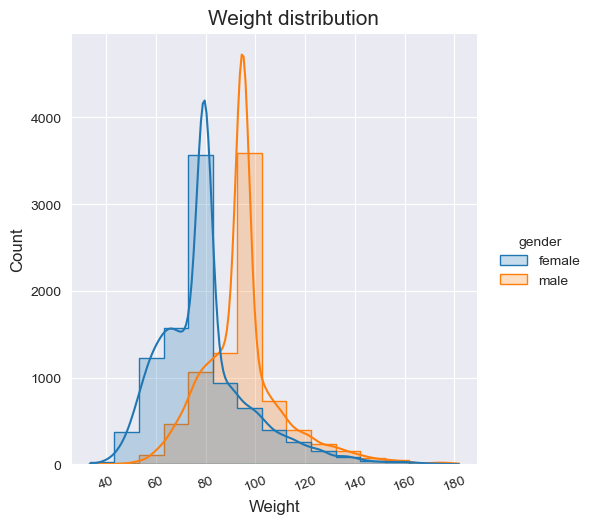

In [28]:
a = sns.displot(df, x="weight_kg", bins=15, kde=True, hue='gender', element="step")

a.fig.set_dpi(100)
a.fig.suptitle("Weight distribution", y = 1.02, size = 15)
plt.xlabel('Weight', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation=20)

plt.show()

In [29]:
df.corr()

C:\Users\Isini\AppData\Local\Temp\ipykernel_7864\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,weight_kg,height_cm,bmi,futime,status
id,1.000000,-0.004537,0.007400,-0.006442,0.010371,-0.011091,-0.005619
age,-0.004537,1.000000,-0.092479,-0.172750,-0.007516,-0.087784,0.325870
weight_kg,0.007400,-0.092479,1.000000,0.469458,0.850963,-0.006097,-0.030636
height_cm,-0.006442,-0.172750,0.469458,1.000000,-0.049940,0.000403,-0.057599
bmi,0.010371,-0.007516,0.850963,-0.049940,1.000000,-0.005981,-0.002059
futime,-0.011091,-0.087784,-0.006097,0.000403,-0.005981,1.000000,-0.069584
status,-0.005619,0.325870,-0.030636,-0.057599,-0.002059,-0.069584,1.000000


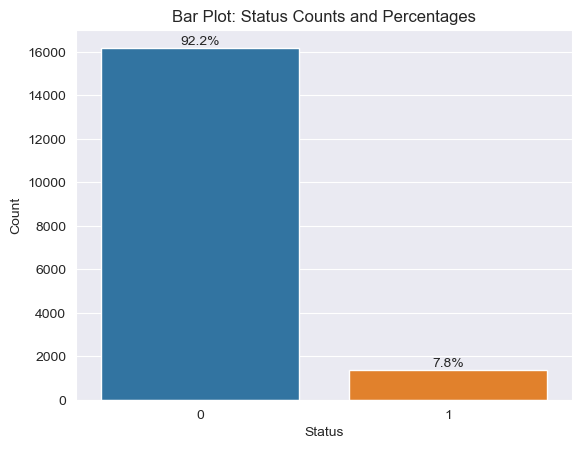

In [30]:
bx = sns.countplot(x='status',data=df)
total = len(df)
for p in bx.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    bx.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Bar Plot: Status Counts and Percentages')
plt.show()

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# grouped bar chart

In [32]:
groupby_gender = df.groupby(['gender', 'status']).size().unstack()
groupby_gender

status,0,1
gender,,
female,8674,674
male,7511,690


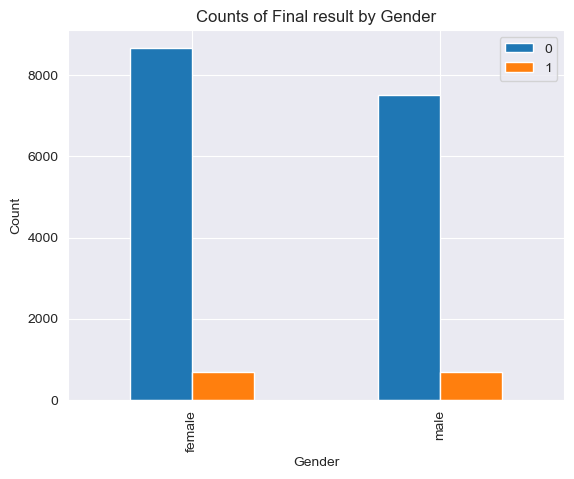

In [33]:
ax = groupby_gender.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Final result by Gender')
ax.legend(loc='upper right')
plt.show()

# age

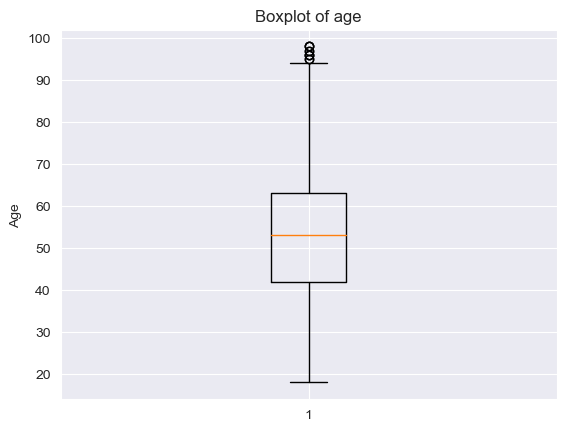

In [34]:
plt.boxplot(df['age'])
plt.ylabel('Age')
plt.title('Boxplot of age')
plt.show()

In [35]:
df['age'].mean()

52.65963872585333

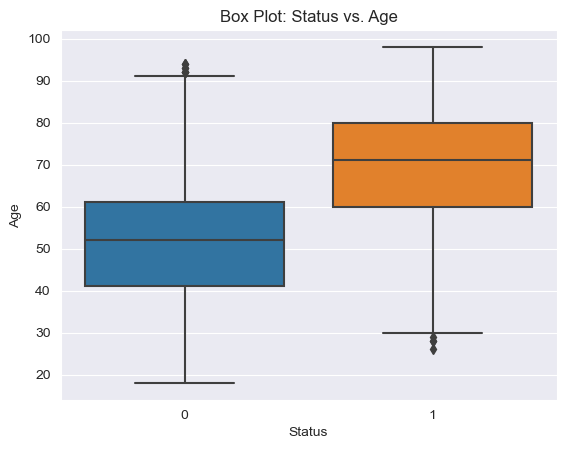

In [36]:
sns.boxplot(x='status', y='age', data=df)
plt.xlabel('Status')
plt.ylabel('Age')
plt.title('Box Plot: Status vs. Age')
plt.show()

In [37]:
df['futime'] = df['futime']/365
df['futime'] 
#groupby_futime = df.groupby(['futime', 'status']).size().unstack()


0        17.153425
1         1.709589
2         4.884932
3         8.610959
4         5.030137
           ...    
17544     5.189041
17545    10.523288
17546    13.920548
17547     9.936986
17548     7.517808
Name: futime, Length: 17549, dtype: float64

In [38]:
groupby_gender = df.groupby(['futime', 'status']).size().unstack()
groupby_gender.mean()

status
0    2.993342
1    1.166809
dtype: float64

# BMI

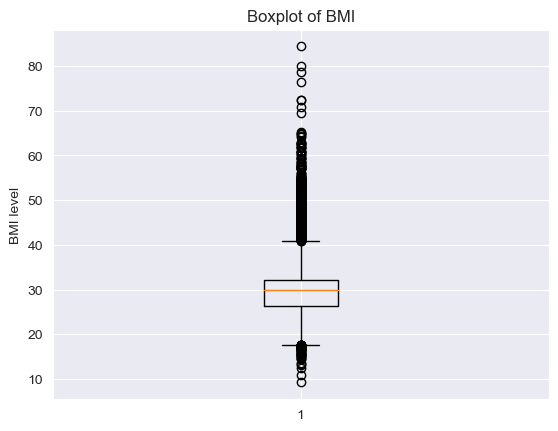

In [39]:
plt.boxplot(df['bmi'])
plt.ylabel('BMI level')
plt.title('Boxplot of BMI')
plt.show()

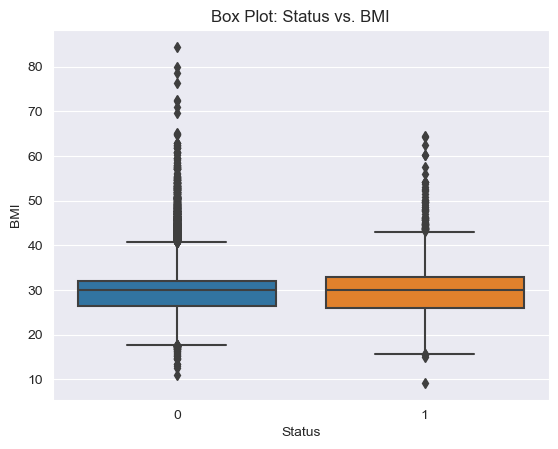

In [40]:
sns.boxplot(x='status', y='bmi', data=df)
plt.xlabel('Status')
plt.ylabel('BMI')
plt.title('Box Plot: Status vs. BMI')
plt.show()

# Height

In [41]:
df['height_cm'].min()

123.0

In [42]:
df['height_cm'].max()

215.0

# Weight

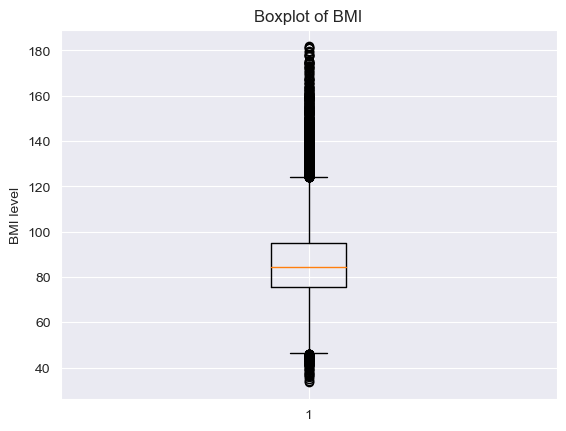

In [43]:
plt.boxplot(df['weight_kg'])
plt.ylabel('BMI level')
plt.title('Boxplot of BMI')
plt.show()

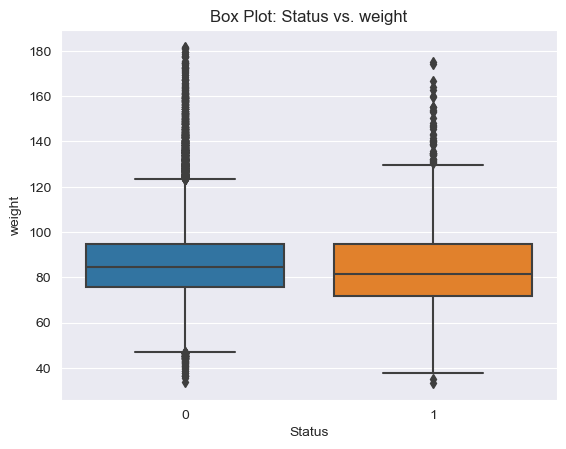

In [44]:
sns.boxplot(x='status', y='weight_kg', data=df)
plt.xlabel('Status')
plt.ylabel('weight')
plt.title('Box Plot: Status vs. weight')
plt.show()

# clinical data


In [45]:
df1 = pd.read_csv('merged_dataset.csv')
df1.head()

,id,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000
1,2,74.166667,NaN,74.166667,74.166667,NaN,74.166667
2,3,55.666667,NaN,55.666667,55.666667,NaN,55.666667
3,4,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500
4,5,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000


In [46]:
df.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status
0,1,57,female,60.000000,163.000000,22.690939,17.153425,0
1,2,67,female,70.400000,168.000000,24.884028,1.709589,0
2,3,53,male,105.800000,186.000000,30.453537,4.884932,0
3,4,56,male,109.300000,170.000000,37.830100,8.610959,0
4,5,68,male,94.869166,177.118898,30.240939,5.030137,1


In [47]:
df2 = pd.merge(df, df1, on='id', how = 'inner')
df2.head()

,id,age,gender,weight_kg,height_cm,bmi,futime,status,avg_pre_hdl,avg_post_hdl,avg_total_hdl,avg_pre_chol,avg_post_chol,avg_total_chol
0,1,57,female,60.000000,163.000000,22.690939,17.153425,0,75.000000,66.750000,68.400000,75.000000,66.750000,68.400000
1,2,67,female,70.400000,168.000000,24.884028,1.709589,0,74.166667,NaN,74.166667,74.166667,NaN,74.166667
2,3,53,male,105.800000,186.000000,30.453537,4.884932,0,55.666667,NaN,55.666667,55.666667,NaN,55.666667
3,4,56,male,109.300000,170.000000,37.830100,8.610959,0,48.714286,36.222222,41.687500,48.714286,36.222222,41.687500
4,5,68,male,94.869166,177.118898,30.240939,5.030137,1,45.500000,44.000000,45.000000,45.500000,44.000000,45.000000


In [49]:
df2.isna().sum()

id                   0
age                  0
gender               0
weight_kg            0
height_cm            0
bmi                  0
futime               0
status               0
avg_pre_hdl       1219
avg_post_hdl      2442
avg_total_hdl        0
avg_pre_chol      1219
avg_post_chol     2442
avg_total_chol       0
dtype: int64